# AEROFIT DATASET ANALYSIS
### Business Problem:
The market research team at AeroFit wants to identify the characteristics of the target
audience for each type of treadmill offered by the company, to provide a better
recommendation of the treadmills to the new customers. The team decides to investigate
whether there are differences across the product with respect to customer characteristics.
* Perform descriptive analytics to create a customer profile for each AeroFit treadmill
product by developing appropriate tables and charts.
* For each AeroFit treadmill product, construct two-way contingency tables and
compute all conditional and marginal probabilities along with their insights/impact on
the business.



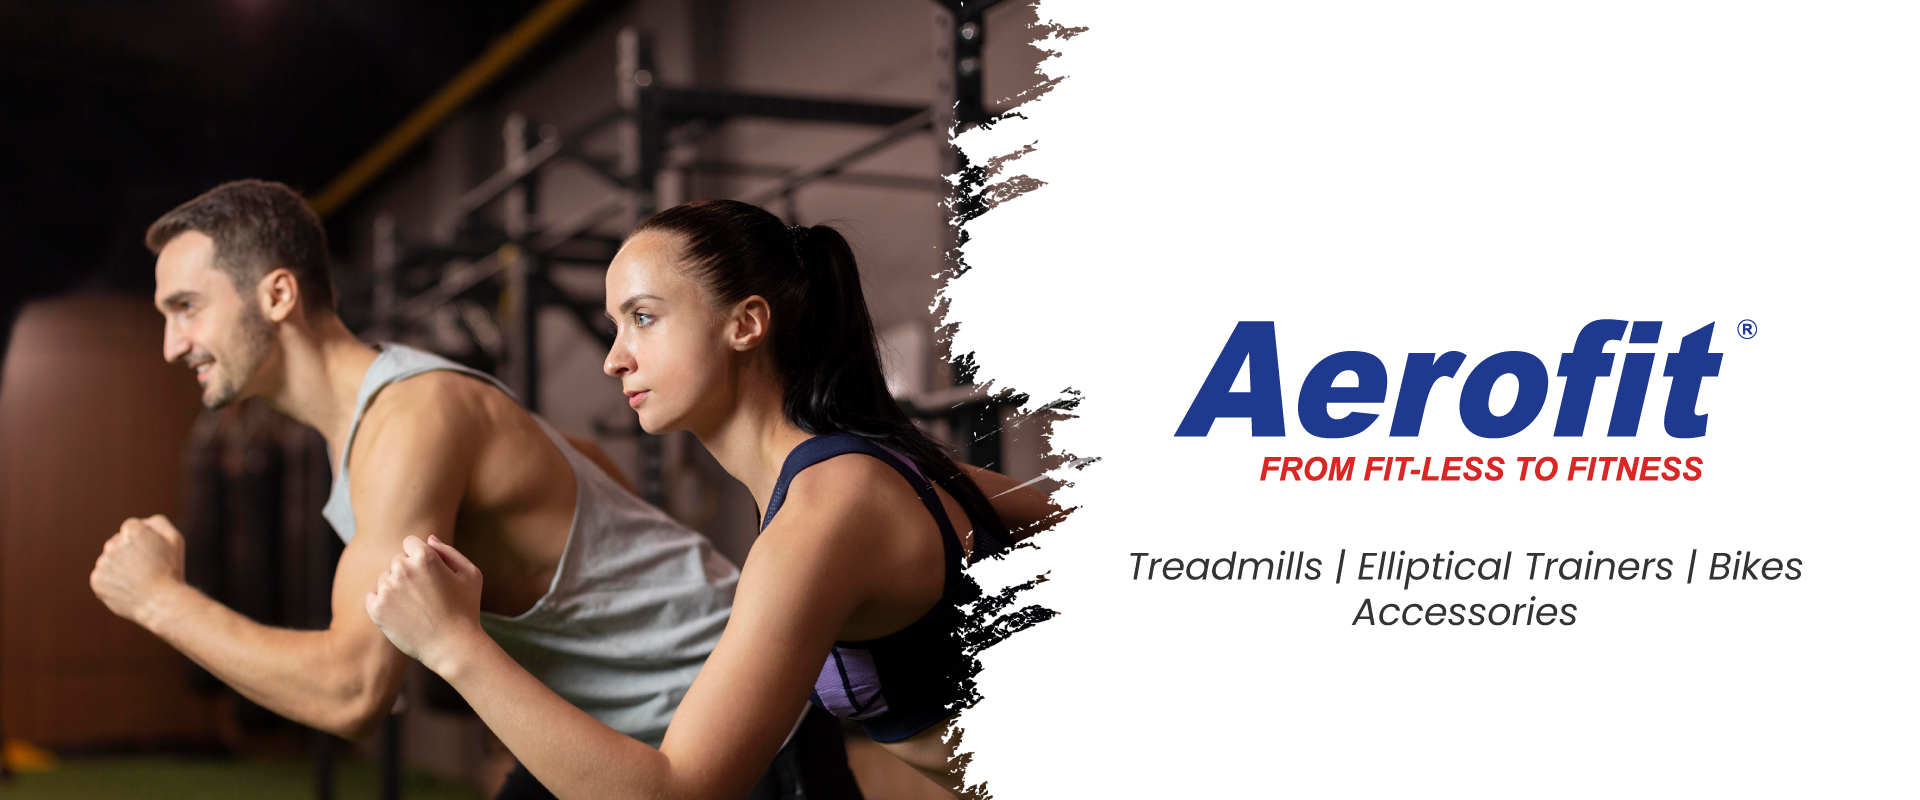

## Dataset Information:
* Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.
* The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months.
#### Source:
Please check the dataset at: ["Dataset Link"](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv)

#### Feature Information:
* **Product:** Product Purchased KP281, KP481, or KP781
* **Age:** In years
* **Gender:** Male/Female
* **Education:** in years
* **MaritalStatus:** single or partnered
* **Usage:** average number of times the customer plans to use the treadmill each week
* **Income:** annual income (in $)
* **Fitness:** self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape
* **Miles:** average number of miles the customer expects to walk/run each week

#### Product Portfolio:
* The KP281 is an entry-level treadmill that sells for $1,500. 
* The KP481 is for mid-level runners that sell for $1,750. 
* The KP781 treadmill has advanced features that sell for $2,500.

## Loading the "aerofit.csv" Dataset:
For exploring and analysing first we import the Python libraries like numpy,pandas,matplotlib,Seaborn and then import the "aerofit.csv" dataset and save it in a dataframe "df1".

In [1]:
# Importing Python Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the 'aerofit.csv' dataset

df1 = pd.read_csv("aerofit.csv")

In [3]:
df1.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47

In [4]:
df1.tail()

Product  Age Gender  Education MaritalStatus  Usage  Fitness  Income  \
175   KP781   40   Male         21        Single      6        5   83416   
176   KP781   42   Male         18        Single      5        4   89641   
177   KP781   45   Male         16        Single      5        5   90886   
178   KP781   47   Male         18     Partnered      4        5  104581   
179   KP781   48   Male         18     Partnered      4        5   95508   

     Miles  
175    200  
176    200  
177    160  
178    120  
179    180

In [5]:
df1.shape

(180, 9)

## Basic Exploration of Data:

In [6]:
# checking the data types of columns

df1.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [7]:
# checking for null values

df1.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [8]:
# checking for duplicate rows

df1.duplicated().sum()

0

In [9]:
# getting the statistical summary of df1

df1.describe(include = 'all')

Product         Age Gender   Education MaritalStatus       Usage  \
count      180  180.000000    180  180.000000           180  180.000000   
unique       3         NaN      2         NaN             2         NaN   
top      KP281         NaN   Male         NaN     Partnered         NaN   
freq        80         NaN    104         NaN           107         NaN   
mean       NaN   28.788889    NaN   15.572222           NaN    3.455556   
std        NaN    6.943498    NaN    1.617055           NaN    1.084797   
min        NaN   18.000000    NaN   12.000000           NaN    2.000000   
25%        NaN   24.000000    NaN   14.000000           NaN    3.000000   
50%        NaN   26.000000    NaN   16.000000           NaN    3.000000   
75%        NaN   33.000000    NaN   16.000000           NaN    4.000000   
max        NaN   50.000000    NaN   21.000000           NaN    7.000000   

           Fitness         Income       Miles  
count   180.000000     180.000000  180.000000  
unique         NaN            NaN         NaN  
top            NaN            NaN         NaN  
freq           NaN            NaN         NaN  
mean      3.311111   53719.577778  103.194444  
std       0.958869   16506.684226   51.863605  
min       1.000000   29562.000000   21.000000  
25%       3.000000   44058.750000   66.000000  
50%       3.000000   50596.500000   94.000000  
75%       4.000000   58668.000000  114.750000  
max       5.000000  104581.000000  360.000000

## Univariate Analysis:

### 1. Analysis of Categorical Columns:

In [10]:
# count of users for each product

df1['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [11]:
# finding Marginal Probability for Product in percentage

round(df1['Product'].value_counts(normalize = True) * 100, 2).astype('str') + '%'

KP281    44.44%
KP481    33.33%
KP781    22.22%
Name: Product, dtype: object

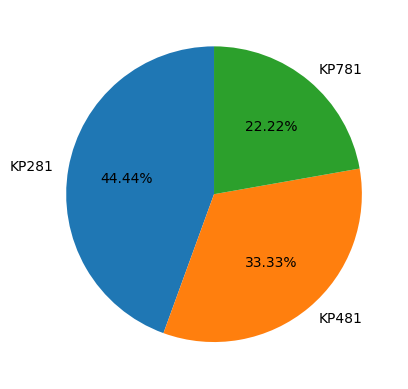

In [12]:
plt.pie(df1['Product'].value_counts(), 
        labels = df1['Product'].value_counts().index,
        startangle = 90,
        autopct = '%1.2f%%'
)
plt.show()

* There are three types of treadmills:KP281(entry_level), KP481(mid_level), KP781(adv_level).
* KP281 treadmill is more popular than KP481 and KP781.
* The probability of buying KP281(44.44%) is more than the probabilities of KP481 and KP781.

In [13]:
# count of Gender

df1['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [14]:
# finding Marginal Probability for Gender in percentage

round(df1['Gender'].value_counts(normalize = True) * 100, 2).astype('str') + '%'

Male      57.78%
Female    42.22%
Name: Gender, dtype: object

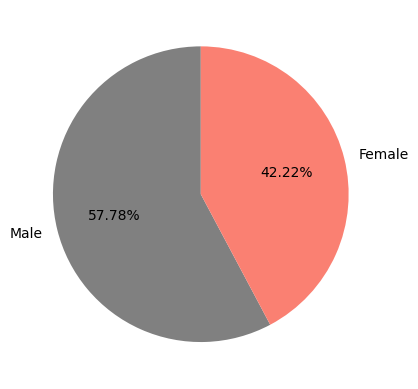

In [15]:
plt.pie(df1['Gender'].value_counts(), 
        labels = df1['Gender'].value_counts().index,
        startangle = 90,
        autopct = '%1.2f%%',
        colors=['gray', 'salmon']
)
plt.show()

* The prob. of Male buyers(57.78%) is more than the prob. of Female buyers(42.22%).

In [16]:
# count of users for each Education type

df1['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [17]:
# finding Marginal Probability for Education in percentage

round(df1['Education'].value_counts(normalize = True) * 100, 2).astype('str') + '%'

16    47.22%
14    30.56%
18    12.78%
15     2.78%
13     2.78%
12     1.67%
21     1.67%
20     0.56%
Name: Education, dtype: object

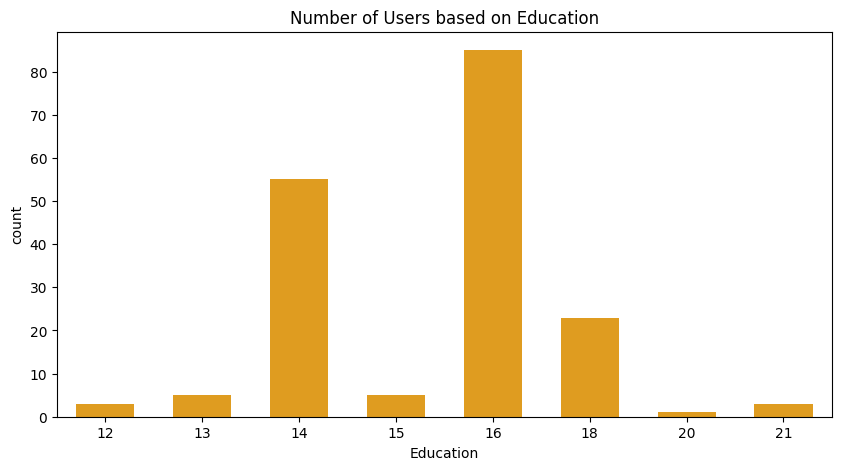

In [18]:
plt.figure(figsize = (10, 5))

sns.countplot(data = df1,
              x = "Education",
              color = 'orange',
              width = 0.6)
plt.title("Number of Users based on Education")
plt.show()

* The probability of buyers having Education type 16 is 47.22% which is maximum.
* The probabilities of buyers having Education type 14 and 18 are 30.56%(second maximum) and 12.78%(third maximum) resp.
* The prob. of buyers having Education type 12,13,15,20,21 are very less(<2%).

In [19]:
# count of users based on MaritalStatus

df1['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [20]:
# finding Marginal Probability for MaritalStatus in percentage

round(df1['MaritalStatus'].value_counts(normalize = True) * 100, 2).astype('str') + '%'

Partnered    59.44%
Single       40.56%
Name: MaritalStatus, dtype: object

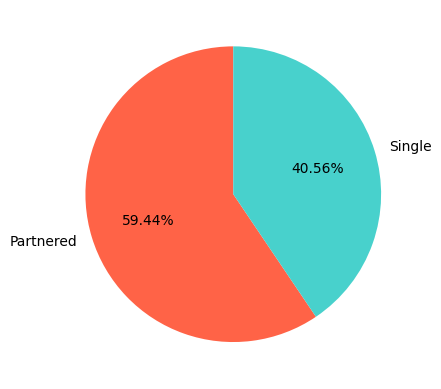

In [21]:
plt.pie(df1['MaritalStatus'].value_counts(), 
        labels = df1['MaritalStatus'].value_counts().index,
        startangle = 90,
        autopct = '%1.2f%%',
        colors = ['tomato','mediumturquoise']
)
plt.show()

* The prob. of Partnerd users(59.44%) is more than single users(40.56%).

In [22]:
# count of users based on Usage type

df1['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [23]:
# finding Marginal Probability for Usage in percentage

round(df1['Usage'].value_counts(normalize = True) * 100, 2).astype('str') + '%'

3    38.33%
4    28.89%
2    18.33%
5     9.44%
6     3.89%
7     1.11%
Name: Usage, dtype: object

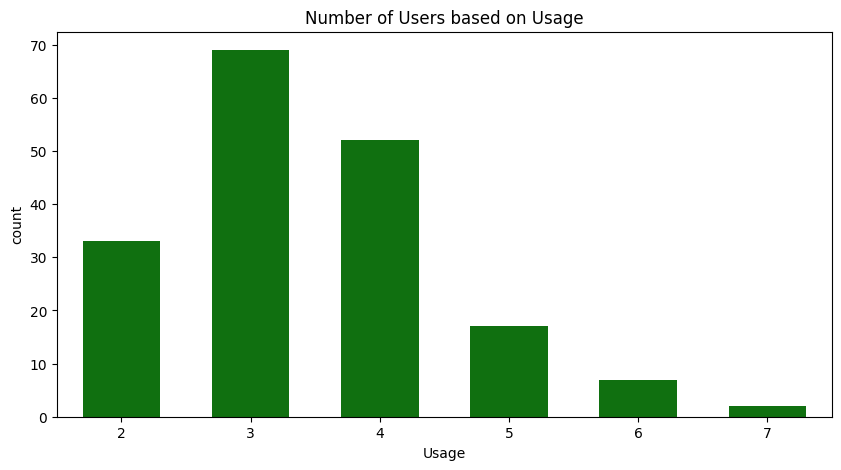

In [24]:
plt.figure(figsize = (10,5))

sns.countplot(data = df1,
              x = "Usage",
              color = 'green',
              width = 0.6)
plt.title("Number of Users based on Usage")
plt.show()

* The prob. of users who use treadmills average 3 times in each week is 38.33% which is maximum.
* The prob. of users who use treadmills average 6 or 7 times in each week is less than 4%.

In [25]:
# count of users based on Fitness

df1['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [26]:
# finding Marginal Probability for Fitness in percentage

round(df1['Fitness'].value_counts(normalize = True) * 100, 2).astype('str') + '%'

3    53.89%
5    17.22%
2    14.44%
4    13.33%
1     1.11%
Name: Fitness, dtype: object

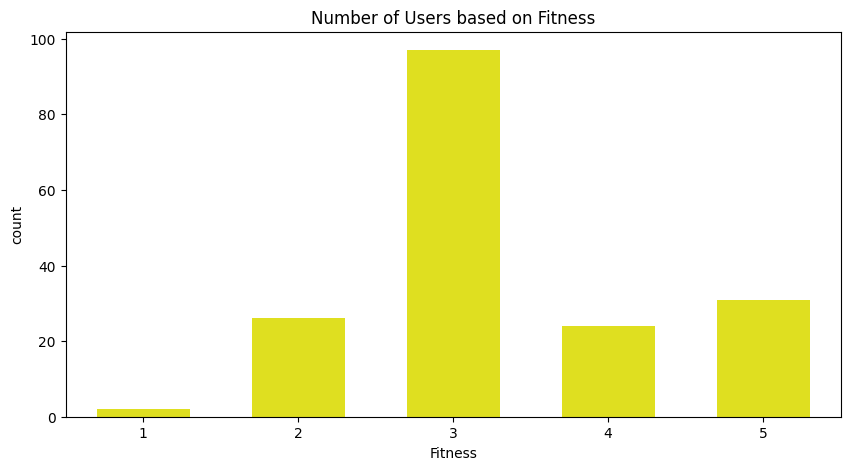

In [27]:

plt.figure(figsize = (10,5))

sns.countplot(data = df1,
              x = "Fitness",
              color = 'yellow',
              width = 0.6)
plt.title("Number of Users based on Fitness")
plt.show()

* The prob. of users having fitness scale 3(good) is 53.89% which is significantly maximum.
* The prob. of users having fitness scale 2(avg), 4(very good), 5(excellent) are almost equal.
* The prob. of users having fitness scale 1(poor) is only 1.1%.

### 2. Analysis of Numerical Columns:

In [28]:
fig = px.box(data_frame = df1, y = 'Age')
fig.update_layout(title = "Age Distribution", width = 900)
fig.show()

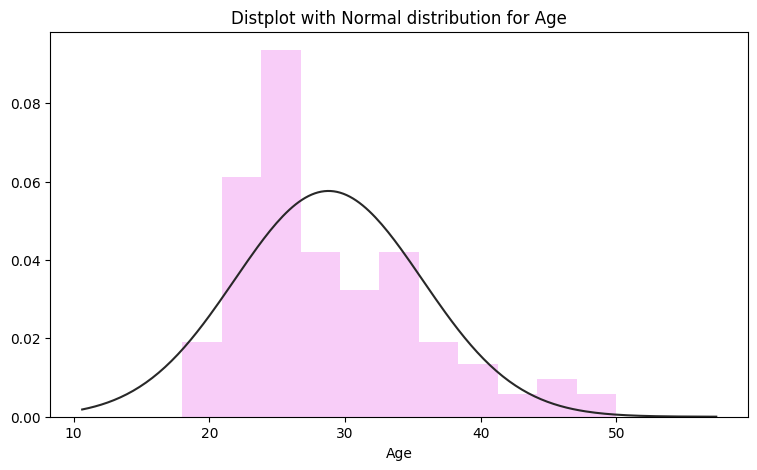

In [29]:
plt.figure(figsize = (9,5))
sns.distplot(df1['Age'],fit = norm, kde=False, color=['violet'])
plt.title("Distplot with Normal distribution for Age")
plt.show()

* The median Age of customers is 26 and 50% of customers are below age 26.
* The minimum age is 18, maximum age is 50 and customers of age greater than 46 are outliers.
* The age is not normally distributed.

In [30]:
fig = px.box(data_frame = df1, y = 'Income')
fig.update_layout(title = "Income Distribution", width = 900)
fig.show()

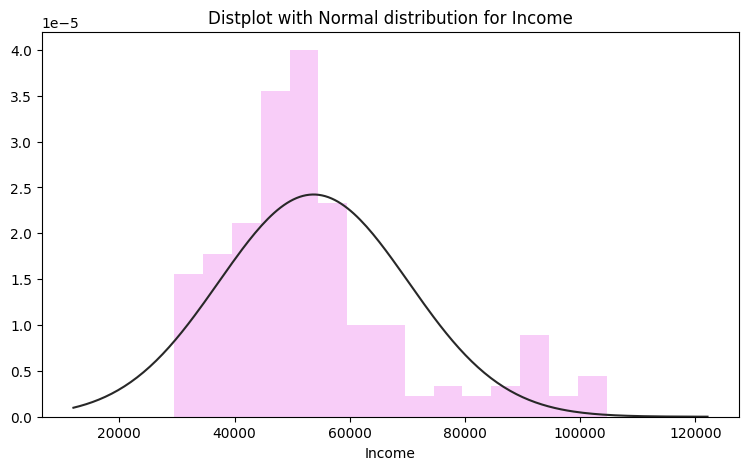

In [31]:
plt.figure(figsize = (9,5))
sns.distplot(df1['Income'], fit = norm, kde = False, color = ['violet'])
plt.title("Distplot with Normal distribution for Income")
plt.show()

* The median income of users is 50.5965K.
* The minimum income is 29.562K and maximum income is 104.581K.
* The users with income more than 77.191K are outliers.
* The income is not normally distributed.

In [32]:
fig = px.box(data_frame = df1, y = 'Miles')
fig.update_layout(title = "Miles Distribution", width = 900)
fig.show()

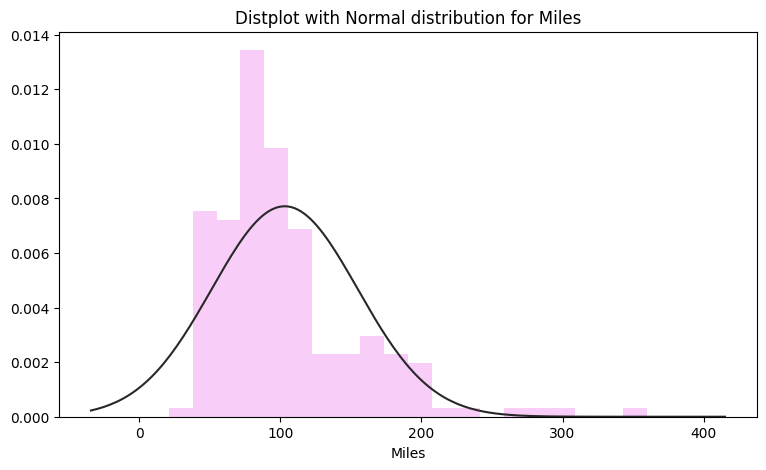

In [33]:
plt.figure(figsize = (9,5))
sns.distplot(df1['Miles'], fit = norm, kde = False, color = ['violet'])
plt.title("Distplot with Normal distribution for Miles")
plt.show()

* The median miles user runs is 94.
* The minimum miles is 21 and maximum miles is 360.
* The users runs more than 188 miles are outliers.
* The Miles is not normally distributed.

## Bivariate Analysis:

### 1. Categorical vs. Categorical:

In [34]:
# Contigency Table(frequency distribution of the "Gender" and "Product")

pd.crosstab(df1.Gender, df1.Product)

Product  KP281  KP481  KP781
Gender                      
Female      40     29      7
Male        40     31     33

In [35]:
# finding conditional probability of Product given that Gender

print((pd.crosstab(df1.Gender, df1.Product, normalize = 'index') * 100).round(2).astype(str) + '%')

Product   KP281   KP481   KP781
Gender                         
Female   52.63%  38.16%   9.21%
Male     38.46%  29.81%  31.73%


In [36]:
df = df1.groupby(['Gender'])['Product'].value_counts().reset_index(name = 'Count')
fig = px.bar(data_frame = df,x = 'Gender', y = 'Count', color = 'Product', barmode = 'group');
fig.update_layout(
    title = "Barplot for Gender for each Product",
    width = 900,
    height = 500
)
fig.show()

* The probability of Females buying KP281(entry_level) treadmill is 52.63% which is more than the prob. of Males buying KP281(38.46%).
* The probability of Females buying KP481(mid_level) treadmill is 38.16% which is more than the prob. of Males buying KP481(29.81%).
* The probability of Males buying KP781(adv_level) treadmill is 38.73% which is significantly more than the prob. of Females buying KP781(9.21%).

In [37]:
# Contigency Table(frequency distribution of the "Education" and "Product")

pd.crosstab(df1.Education, df1.Product)

Product    KP281  KP481  KP781
Education                     
12             2      1      0
13             3      2      0
14            30     23      2
15             4      1      0
16            39     31     15
18             2      2     19
20             0      0      1
21             0      0      3

In [38]:
# finding conditional probability of Product given that Education

print((pd.crosstab(df1.Education, df1.Product, normalize = "index") * 100).round(2).astype(str) + '%')

Product     KP281   KP481   KP781
Education                        
12         66.67%  33.33%    0.0%
13          60.0%   40.0%    0.0%
14         54.55%  41.82%   3.64%
15          80.0%   20.0%    0.0%
16         45.88%  36.47%  17.65%
18           8.7%    8.7%  82.61%
20           0.0%    0.0%  100.0%
21           0.0%    0.0%  100.0%


In [39]:
df = df1.groupby(['Education'])['Product'].value_counts().reset_index(name = 'Count')
fig = px.bar(data_frame = df,x = 'Education', y = 'Count', color = 'Product', barmode = 'group');
fig.update_layout(
    title = "Barplot for Education for each Product",
    width = 900,
    height = 500
)
fig.show()

* The conditional prob. for the customers having Education type 20, 21 buying KP281 and KP481 treadmills is 0%. They are mostly buying adv_level treadmills.
* The conditional prob. for the customers having Education type 12, 13 buying KP_781(adv_level) treadmills is 0%. They are mostly buying entry and mid level treadmills.
* The customers with education 14,16 are buying more KP281 and KP481 treadmills.
* The customers with education 18, 16 are buying more KP781 treadmills.

In [40]:
# Contigency Table(frequency distribution of the "MaritalStatus" and "Product")

pd.crosstab(df1.MaritalStatus, df1.Product)

Product        KP281  KP481  KP781
MaritalStatus                     
Partnered         48     36     23
Single            32     24     17

In [41]:
# finding conditional probability of Product given that MaritalStatus

print((pd.crosstab(df1.MaritalStatus, df1.Product, normalize = "index") * 100).round(2).astype(str) + '%')

Product         KP281   KP481   KP781
MaritalStatus                        
Partnered      44.86%  33.64%   21.5%
Single         43.84%  32.88%  23.29%


In [42]:
df = df1.groupby(['MaritalStatus'])['Product'].value_counts().reset_index(name = 'Count')
fig = px.bar(data_frame = df,x = 'MaritalStatus', y = 'Count', color = 'Product', barmode = 'group')
fig.update_layout(
    title = "Barplot for MaritalStatus for each Product",
    width = 900,
    height = 500
)
fig.show()

* The conditional probabilities of Partnered and Single users buying three treadmills are almost equal.MaritalStatus has very less effect on buying the treadmills.


In [43]:
# Contigency Table(frequency distribution of the "Usage" and "Product")

pd.crosstab(df1.Usage, df1.Product)

Product  KP281  KP481  KP781
Usage                       
2           19     14      0
3           37     31      1
4           22     12     18
5            2      3     12
6            0      0      7
7            0      0      2

In [44]:
# finding conditional probability of Product given that Usage

print((pd.crosstab(df1.Usage, df1.Product, normalize = "index") * 100).round(2).astype(str) + '%')

Product   KP281   KP481   KP781
Usage                          
2        57.58%  42.42%    0.0%
3        53.62%  44.93%   1.45%
4        42.31%  23.08%  34.62%
5        11.76%  17.65%  70.59%
6          0.0%    0.0%  100.0%
7          0.0%    0.0%  100.0%


In [45]:
df = df1.groupby(['Usage'])['Product'].value_counts().reset_index(name = 'Count')
fig = px.bar(data_frame = df, x = 'Usage', y = 'Count', color = 'Product', barmode = 'group')
fig.update_layout(
    title = "Barplot for Usage for each Product",
    width = 900,
    height = 500
)
fig.show()

* The conditional prob. of the customers using average 2 times in a week buying adv_level treadmills is 0%.They are buying mostly entry_level and mid_level treadmills.
* The conditional prob. of the customers using average 3 times in a week buying adv_level treadmills is 1.45%.They are buying mostly entry_level and mid_level treadmills.
* The conditional prob. of the customers using average 4 times in a week buying KP_281 and KP_781 treadmills are more than KP_481 treadmills.
* The conditional prob. of the customers using average 5 times in a week buying KP_781 treadmills is more than KP_281 and KP_481 treadmills.
* The conditional prob. of the customers using average 6 or 7 times in a week buying KP_781 treadmills is 100%.

In [46]:
# Contigency Table(frequency distribution of the "Fitness" and "Product")

pd.crosstab(df1.Fitness, df1.Product)

Product  KP281  KP481  KP781
Fitness                     
1            1      1      0
2           14     12      0
3           54     39      4
4            9      8      7
5            2      0     29

In [47]:
# finding conditional probability of Product given that Fitness

print((pd.crosstab(df1.Fitness, df1.Product, normalize = "index") * 100).round(2).astype(str) + '%')

Product   KP281   KP481   KP781
Fitness                        
1         50.0%   50.0%    0.0%
2        53.85%  46.15%    0.0%
3        55.67%  40.21%   4.12%
4         37.5%  33.33%  29.17%
5         6.45%    0.0%  93.55%


In [48]:
df = df1.groupby(['Fitness'])['Product'].value_counts().reset_index(name = 'Count')
fig = px.bar(data_frame = df, x = 'Fitness', y = 'Count', color = 'Product', barmode = 'group')
fig.update_layout(
    title = "Barplot for Fitness for each Product",
    width = 900,
    height = 500
)
fig.show()

* The conditional probabilities of users with fitness 1(poor) buying KP_281, KP_481 and KP_781 are 50%, 50% and 0% resp. 
* The conditional probabilities of users with fitness 2(average) buying KP_281 is 53.85% and and KP_481 is 46.15% and KP_781 is 0%. 
* The conditional probabilities of users with fitness 3(good) buying KP_281 is 55.67% and and KP_481 is 40.21% and KP_781 is 4.12%. 
* The conditional probabilities of users with fitness 4(very good) buying KP_281, KP_481 and KP_781 are almost equal.
* The conditional probabilities of users with fitness 5(excellent) buying KP_281 is 6.45% and and KP_481 is 0% and KP_781 is 93.55%.  

### 2. Categorical vs. Numerical:

In [49]:
fig = px.box(data_frame = df1, x = 'Product', y = 'Age', color = 'Product')
fig.update_layout(title = "Distribution of Age for each Product")
fig.show()

* The median age of the customers buying KP_281 and KP_481 are same i.e 26 the median age of the customers buying KP_781 is 27.
* The minimum age of customers buying KP_281, KP_481 and KP_781 are 18, 19 and 22 resp. 

In [50]:
fig = px.box(data_frame = df1, x = 'Product', y = 'Income', color = 'Product')
fig.update_layout(title = "Distribution of Income for each Product")
fig.show()

* The median income of the customers buying KP_281 and KP_481 are 46.6K and 49.4K resp. which are less than the median income of the customers buying KP_781 is 76.5K.
* The minimum income of customers buying KP_281, KP_481 and KP_781 are 29.5K, 31.8K and 48.5K resp.i.e the minimum income of customers buying KP_281, KP_481 are less than the minimum income of customers buying KP_781.
* The maximum income of customers buying KP_281, KP_481 and KP_781 are 68.2K, 67.0K and 104.5K resp.i.e the maximum income of customers buying KP_281, KP_481 are less than the maximum income of customers buying KP_781.

In [51]:
fig = px.box(data_frame = df1, x = 'Product', y = 'Miles', color = 'Product')
fig.update_layout(title = "Distribution of Miles for each Product")
fig.show()

* The median miles of the users of KP_281 and KP_481 run are same i.e. 85 miles which is less than the median miles of the users of KP_781 runs is 160 miles.
* The minimum and maximum miles of the users of KP_281 and KP_481 run are less than the minimum and maximum miles of the users of KP_781 resp.

In [52]:
fig = px.box(data_frame = df1, x = 'Fitness', y = 'Income', color = 'Fitness')
fig.update_layout(title = "Distribution of Income for each Fitness type")
fig.show()

* The minimum, maximum and median income of customers with fitness scale-5(excellent) are maximum.
* The minimum, maximum and median income of customers with fitness scale-2(average) are minimum.

In [53]:
fig = px.box(data_frame = df1, x = 'Fitness', y = 'Miles', color = 'Fitness')
fig.update_layout(title = "Distribution of Miles for each Fitness type")
fig.show()

* The minimum, maximum and median miles the customers with fitness scale-5(excellent) run are maximum.
* The minimum, maximum and median miles the customers with fitness scale-1(poor) run are minimum.

### 3. Numerical vs. Numerical:

In [54]:
fig = px.scatter(df1, x = "Age", y = "Income")
fig.update_layout(title = "Relationship between Age and Income")
fig.show()

* As age increases income increases. But there are some customers whose income is more at low age.

In [55]:
fig = px.scatter(df1, x = "Age", y = "Miles")
fig.update_layout(title = "Relationship between Age and Miles")
fig.show()

* There is no strong relation between Age and Miles.

## Multivariate Analysis:

In [56]:
fig = px.box(data_frame = df1, x = 'Gender', y = 'Income', color = 'MaritalStatus')
fig.update_layout(title = "Distribution of Income per Gender for each MaritalStatus type")
fig.show()

* The median and maximum incomes of Male Partnered customers are maximum.
* The median income of Male Single and Female Partnered customers are almost same.

In [57]:
fig = px.box(data_frame = df1, x = 'Education', y = 'Age', color = 'Product')
fig.update_layout(title = "Distribution of Age per Education type for each Product")
fig.show()

* The maximum median age of customers of Education type 12 is 27.5 for KP_281.
* The maximum median age of customers of Education type 16 is 33 for KP_481.
* The maximum median age of customers of Education type 18 is 28 for KP_781.

In [58]:
fig = px.scatter(df1, x = "Age", y = "Income", color = 'Product')
fig.update_layout(title = "Relationship between Age and Income for each Product")
fig.show()

* For each product, as the age increases income increases.
* There is a strong correlation between age and income for KP_781 customers.

In [59]:
fig = px.scatter(df1, x = "Age", y = "Income", color = 'Gender')
fig.update_layout(title = "Relationship between Age and Income for each Gender")
fig.show()

* There is a strong correlation between age and income for male customers than female customers.

In [60]:
fig = px.scatter(df1, x = "Age", y = "Miles", color = "Product", size = 'Income')
fig.update_layout(title = "Relationship between Age, Miles and Income for each Product")
fig.show()

* There is very weak relation between age and miles for KP_281 and KP_481 customers whereas the relation is moderate for KP_781 customers.

### pairplot

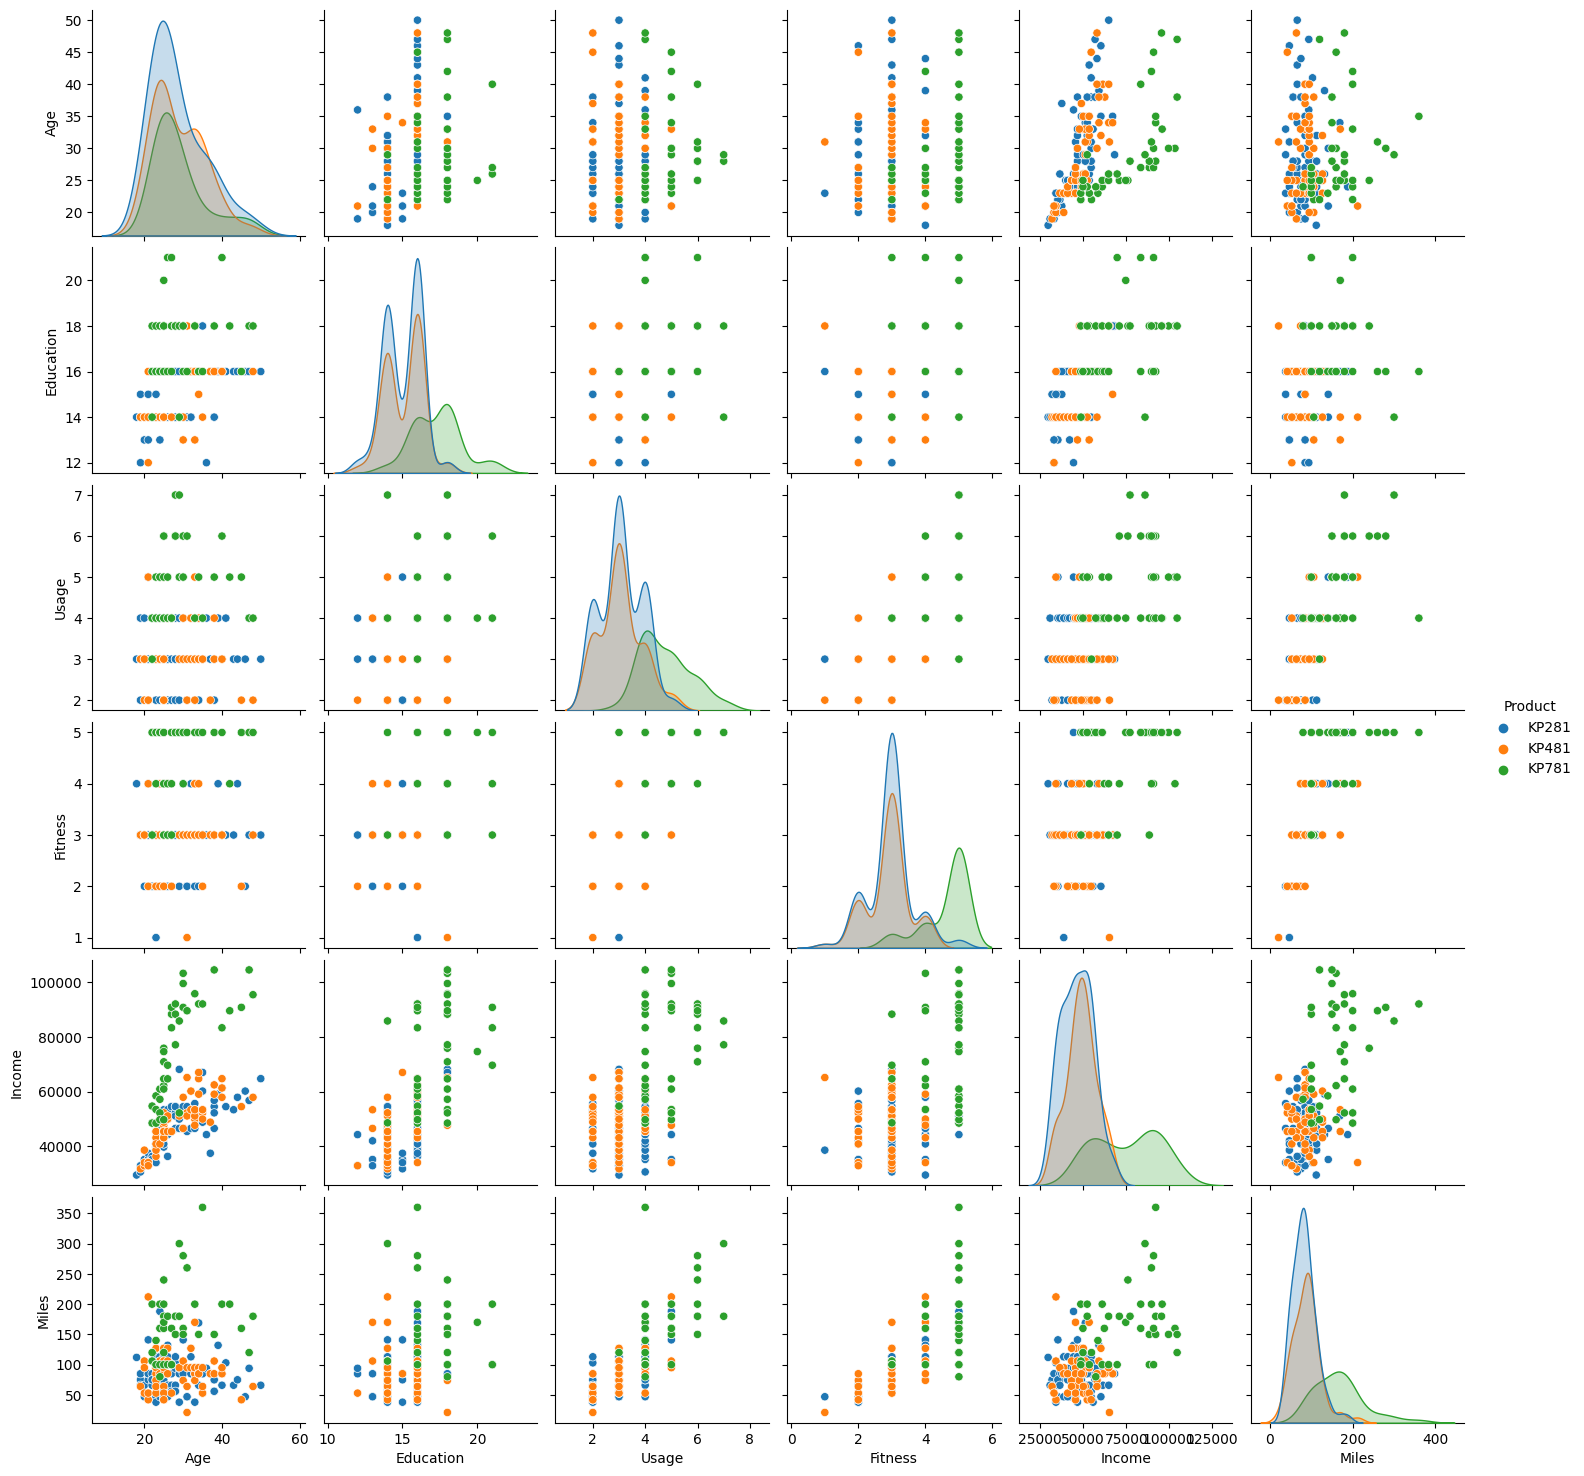

In [61]:
sns.pairplot(data = df1, hue = 'Product')
plt.show()

* There are good correlation between Age and Income.
* The KP_781 users having income greater than 70K runs more miles per week.

### heatmap

In [63]:
# getting the numerical columns

numerical_data = df1[[col for col in df1.columns if df1[col].dtypes == 'int64']]
numerical_data

Age  Education  Usage  Fitness  Income  Miles
0     18         14      3        4   29562    112
1     19         15      2        3   31836     75
2     19         14      4        3   30699     66
3     19         12      3        3   32973     85
4     20         13      4        2   35247     47
..   ...        ...    ...      ...     ...    ...
175   40         21      6        5   83416    200
176   42         18      5        4   89641    200
177   45         16      5        5   90886    160
178   47         18      4        5  104581    120
179   48         18      4        5   95508    180

[180 rows x 6 columns]

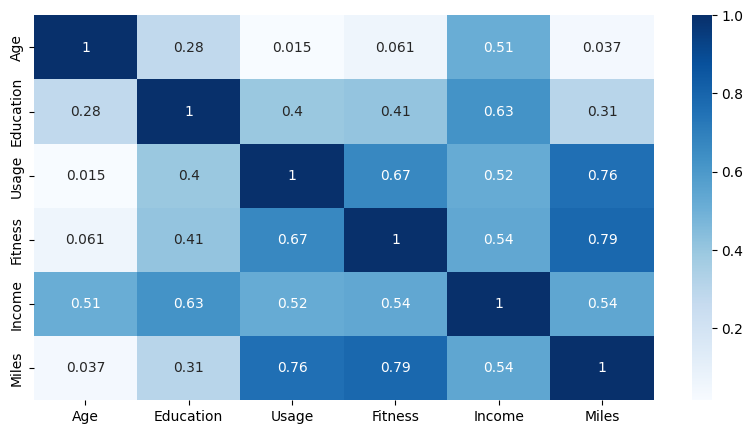

In [64]:
plt.figure(figsize = (10,5))
sns.heatmap(numerical_data.corr(),
           cmap = 'Blues',
           annot = True)
plt.show()

* There is a strong correlation between Miles and Usage & Miles and Fitness.
* There is a good correlation between Usage and Fitness & Education and Income.
* There is a moderate correlation between Usage and Income, Age and Income & Miles and Income.

## Loading the "aerofit.csv" Dataset:
For exploring and analysing, we import the 'gender_color.csv' dataset and save it in a dataframe "df2".

In [65]:
# loading the 'gender_color.csv' dataset

df2 = pd.read_csv('gender_color.csv')

In [66]:
df2.head()

gender fav_color
0  Female       Red
1    Male       Red
2  Female       Red
3  Female      Blue
4  Female       Red

In [67]:
df2.shape

(100, 2)

## Basic Exploration of Data:

In [68]:
# checking the info of df2

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   gender     100 non-null    object
 1   fav_color  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [69]:
# getting the statistical summary of df2

df2.describe(include = 'all')

gender fav_color
count      100       100
unique       2         2
top     Female       Red
freq        51        59

## Univariate Analysis:

In [70]:
# count of users based on gender

df2['gender'].value_counts()

Female    51
Male      49
Name: gender, dtype: int64

In [71]:
# finding Marginal Probability for gender in percentage

round(df2['gender'].value_counts(normalize = True) * 100, 2).astype('str') + '%'

Female    51.0%
Male      49.0%
Name: gender, dtype: object

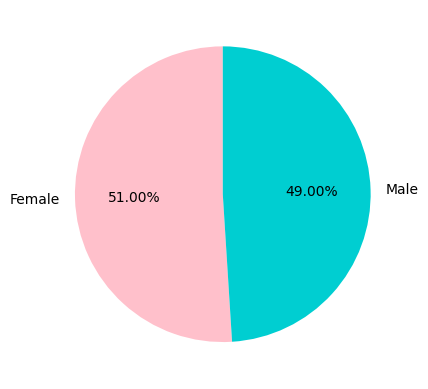

In [72]:
plt.pie(df2['gender'].value_counts(), 
        labels = df2['gender'].value_counts().index,
        startangle = 90,
        autopct = '%1.2f%%',
        colors = ['pink', 'darkturquoise']
)
plt.show()

* The probability of female and male are 51% and 49% respectively.

In [73]:
# count of users based on fav_color

df2['fav_color'].value_counts()

Red     59
Blue    41
Name: fav_color, dtype: int64

In [74]:
# finding Marginal Probability for fav_color in percentage

round(df2['fav_color'].value_counts(normalize = True) * 100, 2).astype('str') + '%'

Red     59.0%
Blue    41.0%
Name: fav_color, dtype: object

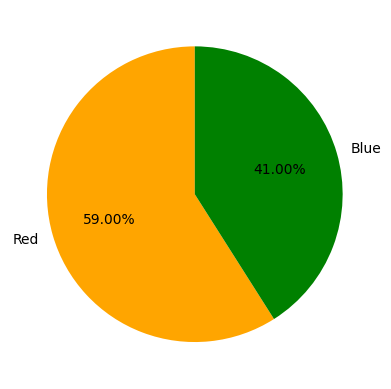

In [75]:
plt.pie(df2['fav_color'].value_counts(), 
        labels = df2['fav_color'].value_counts().index,
        startangle = 90,
        autopct = '%1.2f%%',
        colors = ['orange', 'green']
)
plt.show()

* The probability of buying colours red and blue treadmills are 59% and 41% respectively.

## Bivariate Analysis:

In [76]:
# Contigency Table(frequency distribution of the "fav_color" and "gender")

pd.crosstab(df2.fav_color, df2.gender)

gender     Female  Male
fav_color              
Blue           25    16
Red            26    33

In [77]:
# finding conditional probability of gender given that fav_color

print((pd.crosstab(df2.fav_color, df2.gender, normalize = 'index') * 100).round(2).astype('str') + '%')

gender     Female    Male
fav_color                
Blue       60.98%  39.02%
Red        44.07%  55.93%


In [78]:
df = df2.groupby(['fav_color'])['gender'].value_counts().reset_index(name = 'Count')
fig = px.bar(data_frame = df, x = 'fav_color', y = 'Count', color = 'gender', barmode = 'group')
fig.update_layout(
    title = "Barplot for Fitness for each Product",
    width = 900,
    height = 500
)
fig.show()

* The probability of females for buying a blue colour treadmill is more than males.
* The probability of males for buying a red colour treadmill is more than females.

# Insights:

* There are three types of treadmills:KP281(entry_level), KP481(mid_level), KP781(adv_level).
* KP281 treadmill is more popular than KP481 and KP781.
* The probability of buying KP281(44.44%) is more than the probabilities of KP481 and KP781.
* The prob. of Male buyers(57.78%) is more than the prob. of Female buyers(42.22%).

* The probability of buyers having Education type 16 is 47.22% which is maximum.
* The probabilities of buyers having Education type 14 and 18 are 30.56%(second maximum) and 12.78%(third maximum) resp.
* The prob. of buyers having Education type 12,13,15,20,21 are very less(<2%).

* The prob. of Partnerd users(59.44%) is more than single users(40.56%).

* The prob. of users who use treadmills average 3 times in each week is 38.33% which is maximum.
* The prob. of users who use treadmills average 6 or 7 times in each week is less than 4%.

* The prob. of users having fitness scale 3(good) is 53.89% which is significantly maximum.
* The prob. of users having fitness scale 2(avg), 4(very good), 5(excellent) are almost equal.
* The prob. of users having fitness scale 1(poor) is only 1.1%.

* The median Age of customers is 26 and 50% of customers are below age 26.
* The minimum age is 18, maximum age is 50 and customers of age greater than 46 are outliers.
* The age is not normally distributed.

* The median income of users is 50.5965K.
* The minimum income is 29.562K and maximum income is 104.581K.
* The users with income more than 77.191K are outliers.
* The income is not normally distributed.

* The median miles user runs is 94.
* The minimum miles is 21 and maximum miles is 360.
* The users runs more than 188 miles are outliers.
* The Miles is not normally distributed.

* The probability of Females buying KP281(entry_level) treadmill is 52.63% which is more than the prob. of Males buying KP281(38.46%).
* The probability of Females buying KP481(mid_level) treadmill is 38.16% which is more than the prob. of Males buying KP481(29.81%).
* The probability of Males buying KP781(adv_level) treadmill is 38.73% which is significantly more than the prob. of Females buying KP781(9.21%).

* The conditional prob. for the customers having Education type 20, 21 buying KP281 and KP481 treadmills is 0%. They are mostly buying adv_level treadmills.
* The conditional prob. for the customers having Education type 12, 13 buying KP_781(adv_level) treadmills is 0%. They are mostly buying entry and mid level treadmills.
* The customers with education 14,16 are buying more KP281 and KP481 treadmills.
* The customers with education 18, 16 are buying more KP781 treadmills.

* The conditional probabilities of Partnered and Single users buying three treadmills are almost equal.MaritalStatus has very less effect on buying the treadmills.

* The conditional probabilities of users with fitness 1(poor) buying KP_281, KP_481 and KP_781 are 50%, 50% and 0% resp.
* The conditional probabilities of users with fitness 2(average) buying KP_281 is 53.85% and and KP_481 is 46.15% and KP_781 is 0%.
* The conditional probabilities of users with fitness 3(good) buying KP_281 is 55.67% and and KP_481 is 40.21% and KP_781 is 4.12%.
* The conditional probabilities of users with fitness 4(very good) buying KP_281, KP_481 and KP_781 are almost equal.
* The conditional probabilities of users with fitness 5(excellent) buying KP_281 is 6.45% and and KP_481 is 0% and KP_781 is 93.55%.

* The median age of the customers buying KP_281 and KP_481 are same i.e 26 the median age of the customers buying KP_781 is 27.
* The minimum age of customers buying KP_281, KP_481 and KP_781 are 18, 19 and 22 resp.

* The median income of the customers buying KP_281 and KP_481 are 46.6K and 49.4K resp. which are less than the median income of the customers buying KP_781 is 76.5K.
* The minimum income of customers buying KP_281, KP_481 and KP_781 are 29.5K, 31.8K and 48.5K resp.i.e the minimum income of customers buying KP_281, KP_481 are less than the minimum income of customers buying KP_781.
* The maximum income of customers buying KP_281, KP_481 and KP_781 are 68.2K, 67.0K and 104.5K resp.i.e the maximum income of customers buying KP_281, KP_481 are less than the maximum income of customers buying KP_781.

* The minimum, maximum and median income of customers with fitness scale-5(excellent) are maximum.
* The minimum, maximum and median income of customers with fitness scale-2(average) are minimum.

* The median and maximum incomes of Male Partnered customers are maximum.
* The median income of Male Single and Female Partnered customers are almost same.

* The maximum median age of customers of Education type 12 is 27.5 for KP_281.
* The maximum median age of customers of Education type 16 is 33 for KP_481.
* The maximum median age of customers of Education type 18 is 28 for KP_781.

* There are good correlation between Age and Income.
* The KP_781 users having income greater than 70K runs more miles per week.

* There is a strong correlation between Miles and Usage & Miles and Fitness.
* There is a good correlation between Usage and Fitness & Education and Income.
* There is a moderate correlation between Usage and Income, Age and Income & Miles and Income.

* The probability of females for buying a blue colour treadmill is more than males.
* The probability of males for buying a red colour treadmill is more than females.

# Recommendations:

* For selling more KP_781 treadmill,company should target people with higer salaries (>70k) & also Males tend more to buy it.
* Also KP_781 treadmill's targeted customers are having age between 22-40.
* Single people with high income mostly prefer KP_781 treadmill that will be most important target audiance for Aerofit.
* Company should provide more colour options except red and blue colour for treadmills.
* Company can provide discounts on KP_481(mid_level) and KP_781(adv_level) to increase sale.